In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2021.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df2=pd.read_csv('../data/Playoffs_2021.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [6]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
#df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
     #    'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.51735
0    0.48265
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.615385
0    0.384615
Name: home_win, dtype: float64

In [11]:
df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,BOS,35.454545,5.454545,9.545455,5.363636,5.340000,3.363636,8.090909,39.363636,0.256091,...,8.000000,11.000000,4.000000,0.0,64.000000,1.000000,0.000000,0.323000,3.100000,1
1,LAD,33.416667,4.000000,8.166667,4.000000,4.166667,3.166667,8.333333,37.250000,0.237500,...,10.000000,15.000000,9.000000,0.0,54.000000,3.000000,0.000000,0.573000,3.600000,1
2,HOU,34.125000,5.437500,8.875000,5.250000,5.124375,3.437500,8.687500,38.437500,0.255875,...,11.750000,13.500000,6.250000,0.0,46.500000,2.500000,1.500000,-0.070000,0.075000,1
3,TBR,36.750000,5.000000,7.750000,4.750000,4.847500,2.750000,11.500000,39.500000,0.211500,...,9.727273,16.363636,6.363636,0.0,44.818182,2.272727,0.545455,-0.008818,-0.563636,1
4,MIL,31.250000,1.500000,6.000000,1.500000,1.562500,2.250000,12.000000,34.500000,0.190750,...,10.062500,13.375000,5.562500,0.0,46.000000,1.875000,0.375000,-0.040750,0.518750,1
5,SFG,31.800000,2.000000,5.800000,2.000000,2.100000,1.200000,9.800000,33.200000,0.181800,...,8.250000,14.333333,5.833333,0.0,53.666667,2.416667,0.916667,0.097583,0.516667,1
6,TBR,36.750000,5.000000,7.750000,4.750000,4.847500,2.750000,11.500000,39.500000,0.211500,...,9.727273,16.363636,6.363636,0.0,44.818182,2.272727,0.545455,-0.008818,-0.563636,0
7,MIL,31.250000,1.500000,6.000000,1.500000,1.562500,2.250000,12.000000,34.500000,0.190750,...,10.062500,13.375000,5.562500,0.0,46.000000,1.875000,0.375000,-0.040750,0.518750,0
8,SFG,31.800000,2.000000,5.800000,2.000000,2.100000,1.200000,9.800000,33.200000,0.181800,...,8.250000,14.333333,5.833333,0.0,53.666667,2.416667,0.916667,0.097583,0.516667,0
9,BOS,35.454545,5.454545,9.545455,5.363636,5.340000,3.363636,8.090909,39.363636,0.256091,...,15.000000,20.250000,9.250000,0.0,46.750000,1.750000,0.500000,0.111000,0.150000,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,DET,33.185185,4.302469,8.018519,4.166667,4.138210,3.024691,9.345679,36.907407,0.236500,...,10.685185,13.962963,5.969136,0.0,51.117284,1.238994,0.408805,0.030623,0.200617,1
1,MIA,33.012346,3.845679,7.679012,3.666667,3.608457,2.777778,9.586420,36.598765,0.227160,...,10.561728,14.308642,5.956790,0.0,51.925926,1.604938,0.648148,-0.048728,-0.748765,0
2,CIN,33.475309,4.851852,8.345679,4.666667,4.652346,3.413580,8.796296,38.037037,0.244253,...,11.500000,13.981481,6.098765,0.0,51.407407,1.106918,0.358491,-0.005957,-0.004321,0
3,CHC,32.753086,4.351852,7.746914,4.148148,4.157099,3.098765,9.851852,36.864198,0.231142,...,10.759259,14.820988,6.253086,0.0,52.981481,1.440252,0.465409,0.061136,0.719753,0
4,NYY,32.907407,4.388889,7.814815,4.111111,4.253951,3.833333,9.148148,37.407407,0.232630,...,10.456790,13.604938,5.611111,0.0,46.413580,1.304348,0.503106,-0.023549,-0.626543,0


In [43]:
#for col in X_train.columns:
    #print(col)

In [10]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [11]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,31.950000,3.950000,6.750000,3.850000,3.657500,3.150000,11.000000,35.650000,0.206650,...,10.000000,11.500000,4.500000,0.0,66.500000,2.000000,0.000000,0.339500,3.000000,1
1,CLE,35.500000,6.000000,9.000000,6.000000,6.000000,4.000000,12.500000,40.000000,0.253500,...,10.714286,12.142857,5.142857,0.0,45.000000,2.857143,0.571429,-0.144714,-1.985714,0
2,OAK,32.428571,4.857143,7.714286,4.571429,4.428571,3.142857,7.714286,36.428571,0.233714,...,8.666667,15.000000,7.666667,0.0,49.333333,3.333333,0.666667,0.086000,0.933333,0
3,MIN,29.500000,1.000000,3.500000,1.000000,1.000000,5.000000,7.000000,34.500000,0.118000,...,10.076923,12.230769,3.692308,0.0,49.538462,2.846154,0.769231,-0.055615,-0.169231,0
4,CHC,31.000000,0.500000,4.500000,0.500000,0.500000,2.500000,8.000000,35.500000,0.145000,...,8.800000,15.200000,6.000000,0.0,58.000000,0.800000,0.000000,0.147800,2.500000,0


In [13]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [14]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [53]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

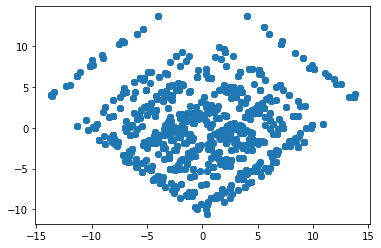

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [15]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [16]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.5384017635712317
Train Mean Accuracy: 0.5415352260778128
Test Mean Accuracy: 0.5769230769230769
Recall Score: 0.5
Precision Score: 0.7272727272727273
F1 Score: 0.5925925925925926


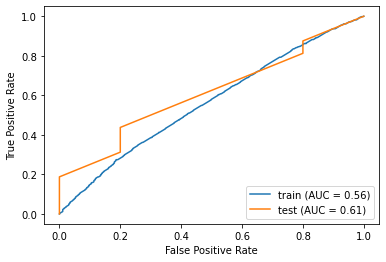

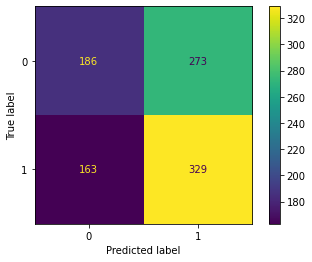

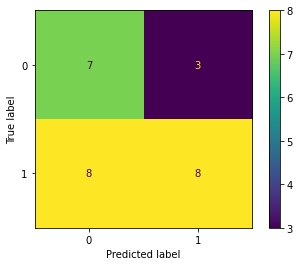

In [17]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [19]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [20]:
new_acc(probabilities)

(0.6153846153846154, 8)

### Home_win, zero imp
***

In [36]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [37]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.6002477620805227
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.5454545454545454
Precision Score: 0.6666666666666666
F1 Score: 0.6


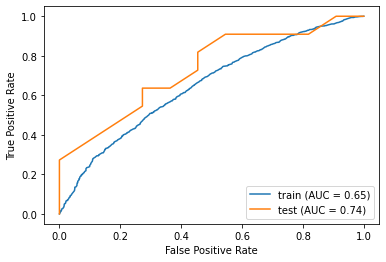

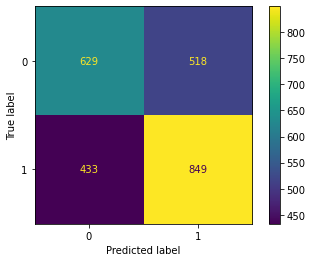

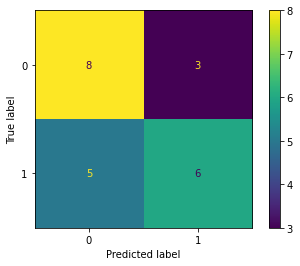

In [38]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [39]:
new_acc(probabilities)

0.65

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 15
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.4994764397905759
Train Mean Accuracy: 0.5509989484752892
Test Mean Accuracy: 0.6153846153846154
Recall Score: 0.5625
Precision Score: 0.75
F1 score: 0.6428571428571429


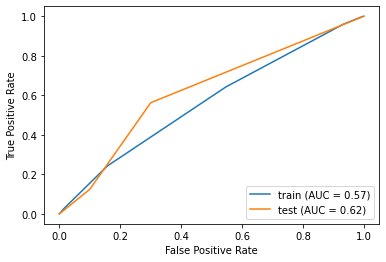

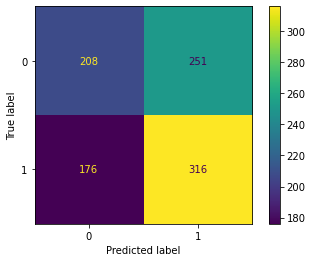

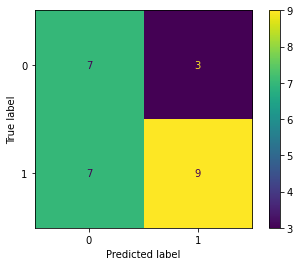

In [21]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [22]:
new_acc(probabilities)

ZeroDivisionError: division by zero

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


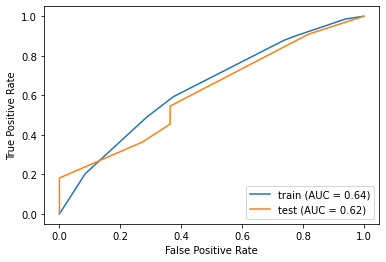

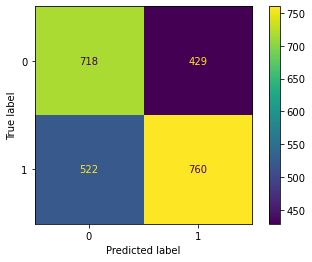

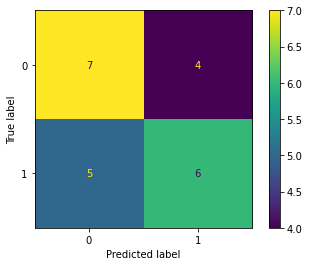

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

In [23]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.4542739046569303
Train Mean Accuracy: 0.5678233438485805
Test Mean Accuracy: 0.6153846153846154
Recall Score: 0.75
Precision Score: 0.6666666666666666
F1 score: 0.7058823529411765


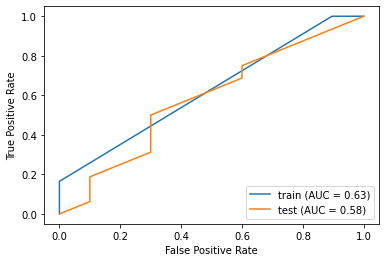

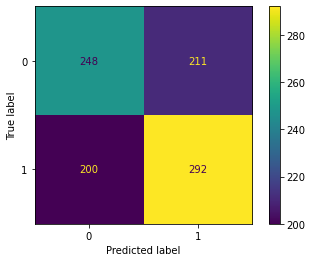

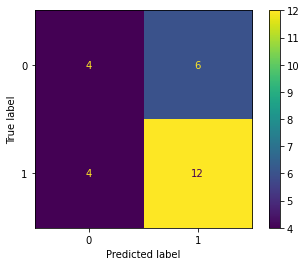

In [24]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [25]:
new_acc(probabilities)

(0.5, 1)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


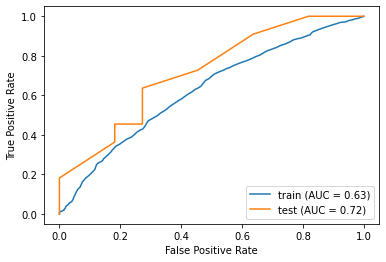

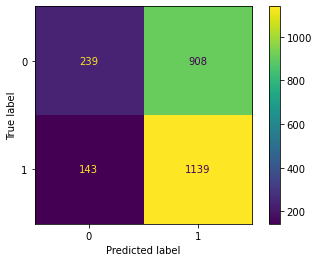

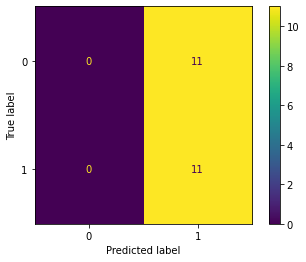

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


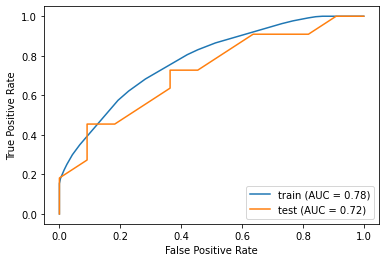

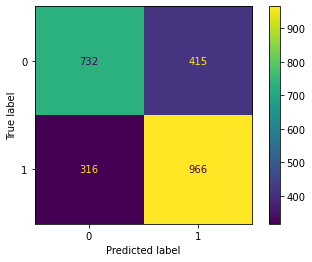

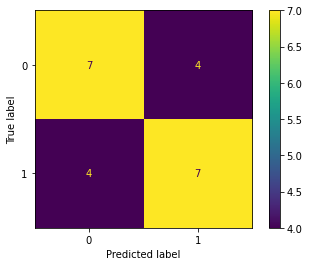

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)